# Folium

In [1]:
import folium

In [2]:
# 플레이데이터 동작
latitude, longtitude = 37.497159, 126.927651

In [3]:
popup_tag="""
<div style=width:60px>
    <a href='https://playdata.io/'>
        플레이데이터
    </a>
</div>
"""

In [4]:
m = folium.Map(location=[latitude, longtitude],
               zoom_start=17,
               width=750,
               height=500
              )
folium.Marker([latitude, longtitude],
              popup=popup_tag,
              tooltip='플레이데이터').add_to(m)
m

In [5]:
import requests
import json

In [6]:
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
response = requests.get(url)
data_json = response.json()
data_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AFG',
   'properties': {'name': 'Afghanistan'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[61.210817, 35.650072],
      [62.230651, 35.270664],
      [62.984662, 35.404041],
      [63.193538, 35.857166],
      [63.982896, 36.007957],
      [64.546479, 36.312073],
      [64.746105, 37.111818],
      [65.588948, 37.305217],
      [65.745631, 37.661164],
      [66.217385, 37.39379],
      [66.518607, 37.362784],
      [67.075782, 37.356144],
      [67.83, 37.144994],
      [68.135562, 37.023115],
      [68.859446, 37.344336],
      [69.196273, 37.151144],
      [69.518785, 37.608997],
      [70.116578, 37.588223],
      [70.270574, 37.735165],
      [70.376304, 38.138396],
      [70.806821, 38.486282],
      [71.348131, 38.258905],
      [71.239404, 37.953265],
      [71.541918, 37.905774],
      [71.448693, 37.065645],
      [71.844638, 36.738171],
      [72.193041, 36.948288],
      [72.63689, 37.047

In [7]:
len(data_json['features'])

180

In [8]:
countries_name = [feature['properties']['name'] for feature in data_json['features']]

In [9]:
countries_name

['Afghanistan',
 'Angola',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antarctica',
 'French Southern and Antarctic Lands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Ivory Coast',
 'Cameroon',
 'Democratic Republic of the Congo',
 'Republic of the Congo',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Northern Cyprus',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Islands',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea Bissau',
 'Equatorial Guinea',
 'Greece',
 'Greenland',
 'Guatemala'

In [10]:
import pandas as pd

In [11]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col='ResponseId')

In [12]:
schema_raw = pd.read_csv('datas/survey_results_schema.csv', index_col='qname')['question']

In [13]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [14]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({
    'Country':country_counts.index,
    'Count':country_counts.values
})

In [15]:
country_counts_df

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

In [16]:
# csv파일로부터 얻은 데이터, 설문 데이터
country_counts_df.Country

0                               United States of America
1                                                  India
2                                                Germany
3      United Kingdom of Great Britain and Northern I...
4                                                 Canada
                             ...                        
175                                               Monaco
176                                             Djibouti
177                                           Seychelles
178                                      Solomon Islands
179                                Saint Kitts and Nevis
Name: Country, Length: 180, dtype: object

In [17]:
set(country_counts_df.Country).symmetric_difference(countries_name)

{'Andorra',
 'Antarctica',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Brunei',
 'Brunei Darussalam',
 'Burundi',
 'Cape Verde',
 'Central African Republic',
 'Congo, Republic of the...',
 "Côte d'Ivoire",
 'East Timor',
 'Equatorial Guinea',
 'Eritrea',
 'Falkland Islands',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Greenland',
 'Guinea Bissau',
 'Hong Kong (S.A.R.)',
 'Iran',
 'Iran, Islamic Republic of...',
 'Isle of Man',
 'Ivory Coast',
 "Lao People's Democratic Republic",
 'Laos',
 'Libya',
 'Libyan Arab Jamahiriya',
 'Macedonia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Monaco',
 'New Caledonia',
 'Nomadic',
 'Northern Cyprus',
 'Palau',
 'Palestine',
 'Puerto Rico',
 'Republic of Korea',
 'Republic of Moldova',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'San Marino',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Somaliland',
 'South Sudan',
 'Syria',
 '

In [18]:
# json으로부터 얻은 데이터, 국가별 경계에 대한 지도의 위도, 경도
countries_name

['Afghanistan',
 'Angola',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antarctica',
 'French Southern and Antarctic Lands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Ivory Coast',
 'Cameroon',
 'Democratic Republic of the Congo',
 'Republic of the Congo',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Northern Cyprus',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Islands',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea Bissau',
 'Equatorial Guinea',
 'Greece',
 'Greenland',
 'Guatemala'

In [19]:
rename_data = {
    'Republic of Korea': 'South Korea',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
}

In [20]:
country_counts_df.replace(rename_data)

Country  Count
0    United States of America  13543
1                       India   6639
2                     Germany   5395
3              United Kingdom   4190
4                      Canada   2490
..                        ...    ...
175                    Monaco      1
176                  Djibouti      1
177                Seychelles      1
178           Solomon Islands      1
179     Saint Kitts and Nevis      1

[180 rows x 2 columns]

In [21]:
country_counts_df.replace(rename_data,inplace=True)

In [22]:
sorted(country_counts_df.Country.values)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong (S.A.R.)',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Republic of...',
 'Iraq

In [23]:
m = folium.Map(location=[30,0], zoom_start=2)

folium.Choropleth(
    geo_data=url,
    data=country_counts_df,
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    threshold_scale=[1,30,100,300,1_000,3_000,10_000,14_000],
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Respondents',
).add_to(m)

folium.LayerControl().add_to(m)

m

In [24]:
m.save('Country.html')

In [25]:
seoul_geojson = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)

folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color='#22AA44',
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

# Wordcloud

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col='ResponseId')

In [29]:
dev_type = survey_raw_df.DevType.copy()

In [31]:
dev_type.dropna(inplace=True)

In [32]:
dev_type

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [33]:
words = ' '.join(dev_type)

In [34]:
words

'Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability Developer, full-stack Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test Developer, full-stack;Student Developer, back-end Developer, desktop or enterprise applications;Developer, mobile;Educator Developer, full-stack;Developer, back-end Engineering manager Developer, full-stack Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator Developer, full-stack;Academic researcher;DevOps specialist Developer, full-stack Developer, full-stack Engineer, data Developer, back-end;Developer, desktop or enterprise applications Student Developer, full-stack Developer, back-end Other (please specify): Developer, full-stack Developer, back-end;Developer, mobile Developer, full-stack;Developer, back-end Developer, desktop or enterprise applications;Developer, embedded applications or d

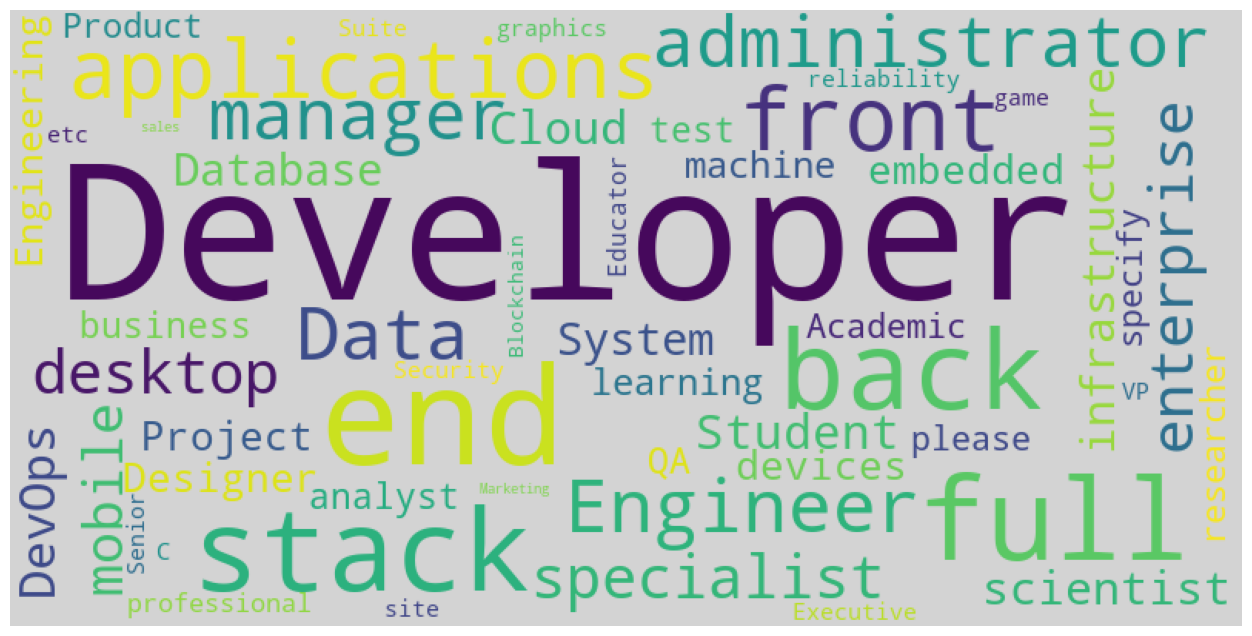

In [40]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path=['폰트 경로']
# max_font_size=60 ---> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color='lightgrey').generate(words)

plt.figure(figsize=(16,8))

# x, y축을 그리지 않습니다.
plt.axis('off')

# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

In [41]:
wc.to_file('DevType.png')